In [94]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler



In [89]:
def get_null_count():
    dt_null = dt.isnull().sum().reset_index().rename(columns= {'index': 'column_name', 0: 'count_null'})
    dt_null['total_count'] = dt.shape[0]
    dt_null['perc_null'] = dt_null['count_null']/dt_null['total_count']
    return dt_null

def split_day_time(data, column):
    return data[column].apply(lambda x: int(x.split(" ")[0])), data[column].apply(lambda x: x.split(" ")[1])


def get_ut_datetime(data, column):
    day_of_month = data[column].apply(lambda x: x.split(" ")[0])
    time_of_day = data[column].apply(lambda x: x.split(" ")[1])
    ut_datetime = pd.to_datetime(day_of_month + '-03' + '-2022' + ' '+ time_of_day,  format= "%d-%m-%Y %H:%M:%S")
    # pst_datetime = pd.to_datetime(day_of_month + '-03' + '-2022' + ' '+ time_of_day,  format= "%d-%m-%Y %H:%M:%S")- timedelta(hours=8, minutes=0)
    return ut_datetime

def get_pst_datetime(data, column):
    return pd.to_datetime(data[column],  format= "%Y-%m-%d %H:%M:%S")- timedelta(hours=8, minutes=0)


In [4]:
dt0 = pd.read_excel('/Users/rsati/Downloads/dd.xlsx')

In [5]:
dt = dt0.copy()
dt.columns= dt.columns.to_series().apply(lambda x: x.replace(" ", "_"))
dt.columns

Index(['Customer_placed_order_datetime',
       'Placed_order_with_restaurant_datetime',
       'Driver_at_restaurant_datetime', 'Delivered_to_consumer_datetime',
       'Driver_ID', 'Restaurant_ID', 'Consumer_ID', 'Delivery_Region',
       'Is_ASAP', 'Order_total', 'Amount_of_discount', 'Amount_of_tip',
       'Refunded_amount'],
      dtype='object')

In [91]:
dt.info()
dt.describe(exclude= None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_placed_order_datetime         18078 non-null  object 
 1   Placed_order_with_restaurant_datetime  18078 non-null  object 
 2   Driver_at_restaurant_datetime          13547 non-null  object 
 3   Delivered_to_consumer_datetime         18078 non-null  object 
 4   Driver_ID                              18078 non-null  int64  
 5   Restaurant_ID                          18078 non-null  int64  
 6   Consumer_ID                            18078 non-null  int64  
 7   Delivery_Region                        18078 non-null  object 
 8   Is_ASAP                                18078 non-null  bool   
 9   Order_total                            18078 non-null  float64
 10  Amount_of_discount                     18078 non-null  float64
 11  Am

,Driver_ID,Restaurant_ID,Consumer_ID,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000
mean,222.448169,108.721263,32010.313475,51.261496,1.356706,3.492022,0.612091
std,105.219194,98.609766,42010.215766,50.599675,6.516667,3.700115,6.073104
min,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,141.000000,23.000000,4243.500000,26.660000,0.000000,1.400000,0.000000
50%,227.000000,77.000000,10972.000000,38.630000,0.000000,2.550000,0.000000
75%,314.000000,186.000000,56857.000000,57.885000,0.000000,4.460000,0.000000
max,438.000000,409.000000,200449.000000,1604.130000,187.880000,120.300000,414.770000


In [7]:
dt.isnull().sum()

Customer_placed_order_datetime              0
Placed_order_with_restaurant_datetime      40
Driver_at_restaurant_datetime            4531
Delivered_to_consumer_datetime              0
Driver_ID                                   0
Restaurant_ID                               0
Consumer_ID                                 0
Delivery_Region                             0
Is_ASAP                                     0
Order_total                                 0
Amount_of_discount                          0
Amount_of_tip                               0
Refunded_amount                             0
dtype: int64

In [8]:
dt.loc[dt['Placed_order_with_restaurant_datetime'].isnull(), 'Placed_order_with_restaurant_datetime'] = dt.loc[dt['Placed_order_with_restaurant_datetime'].isnull(), 'Customer_placed_order_datetime']


In [39]:
dt1= dt.copy()

dt1['Customer_placed_order_datetime'] = get_ut_datetime(data= dt , column='Customer_placed_order_datetime')
dt1['Placed_order_with_restaurant_datetime'] = get_ut_datetime(data= dt , column='Placed_order_with_restaurant_datetime')
dt1['Delivered_to_consumer_datetime'] = get_ut_datetime(data= dt , column='Delivered_to_consumer_datetime')

dt1.loc[dt1['Delivered_to_consumer_datetime'] < dt1['Customer_placed_order_datetime'], 'Delivered_to_consumer_datetime']       = dt1.loc[dt1['Delivered_to_consumer_datetime'] < dt1['Customer_placed_order_datetime'], 'Delivered_to_consumer_datetime'].apply(lambda x: x+ relativedelta(months=1))
dt1.loc[dt1['Placed_order_with_restaurant_datetime'] < dt1['Customer_placed_order_datetime'], 'Placed_order_with_restaurant_datetime']= dt1.loc[dt1['Placed_order_with_restaurant_datetime'] < dt1['Customer_placed_order_datetime'], 'Placed_order_with_restaurant_datetime'].apply(lambda x: x+ relativedelta(months=1))


In [40]:
dt1['Customer_placed_order_datetime_pst'] = get_pst_datetime(data= dt1 , column='Customer_placed_order_datetime')
dt1['Placed_order_with_restaurant_datetime_pst'] = get_pst_datetime(data= dt1 , column='Placed_order_with_restaurant_datetime')
dt1['Delivered_to_consumer_datetime_pst'] = get_pst_datetime(data= dt1 , column='Delivered_to_consumer_datetime')

print(dt1.loc[dt1['Placed_order_with_restaurant_datetime_pst'] < dt1['Customer_placed_order_datetime_pst']][['Customer_placed_order_datetime', 'Customer_placed_order_datetime_pst', 'Placed_order_with_restaurant_datetime', 'Placed_order_with_restaurant_datetime_pst', 'Delivered_to_consumer_datetime', 'Delivered_to_consumer_datetime_pst']].shape)


(0, 6)


In [41]:
dt1['app_order_time'] = (dt1['Placed_order_with_restaurant_datetime_pst'] - dt1['Customer_placed_order_datetime_pst']).astype('timedelta64[s]')/60.0
dt1['total_delivery_time'] = (dt1['Delivered_to_consumer_datetime_pst'] - dt1['Customer_placed_order_datetime_pst']).astype('timedelta64[s]')/60.0

In [44]:
dt1['order_placed_hour'] = dt1.Customer_placed_order_datetime_pst.dt.hour
dt1['order_placed_day'] = dt1.Customer_placed_order_datetime_pst.dt.day
dt1['order_placed_time_of_day'] = np.where((dt1['order_placed_hour'] >= 2) & (dt1['order_placed_hour'] <= 9), 'Morning',
                                          np.where((dt1['order_placed_hour'] > 9) & (dt1['order_placed_hour'] <= 16), 'Afternoon',
                                          'Night'))


In [45]:
dt1[['order_placed_hour']].value_counts(True)
dt1['order_placed_time_of_day'].value_counts(True)

Night        0.480639
Afternoon    0.454696
Morning      0.064664
Name: order_placed_time_of_day, dtype: float64

In [47]:
dt1['delivery_time_bucket'] = np.where(dt1['total_delivery_time']<= 30, '1. 0 to 30', 
                                      np.where(dt1['total_delivery_time']<= 45, '2. 30 to 45', 
                                      np.where(dt1['total_delivery_time']<= 60, '3. 45 to 60', 
                                               '4. More than 60')))

dt1.groupby('Is_ASAP')['delivery_time_bucket'].value_counts(True)


Is_ASAP  delivery_time_bucket
False    4. More than 60         0.852320
         3. 45 to 60             0.111447
         2. 30 to 45             0.032665
         1. 0 to 30              0.003568
True     2. 30 to 45             0.410184
         3. 45 to 60             0.293731
         4. More than 60         0.175961
         1. 0 to 30              0.120125
Name: delivery_time_bucket, dtype: float64

In [48]:
dt1['Customer_placed_last_order']=  dt1.sort_values('Customer_placed_order_datetime').groupby('Consumer_ID')['Customer_placed_order_datetime'].shift(1)
dt1 = dt1.sort_values(['Consumer_ID','Customer_placed_order_datetime'])


In [49]:
dt1[['Consumer_ID', 'Customer_placed_order_datetime', 'Customer_placed_last_order']][dt1.Consumer_ID == 46332]
dt1['last_order_placed_days'] = (dt1['Customer_placed_order_datetime'].dt.date - dt1['Customer_placed_last_order'].dt.date).dt.days
dt1.head()


,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Delivery_Region,Is_ASAP,Order_total,...,Placed_order_with_restaurant_datetime_pst,Delivered_to_consumer_datetime_pst,app_order_time,total_delivery_time,order_placed_hour,order_placed_day,order_placed_time_of_day,delivery_time_bucket,Customer_placed_last_order,last_order_placed_days
407,2022-03-07 20:16:28,2022-03-07 20:17:32,07 20:36:00,2022-03-07 20:49:02,325,66,5,Palo Alto,True,40.62,...,2022-03-07 12:17:32,2022-03-07 12:49:02,1.066667,32.566667,12,7,Afternoon,2. 30 to 45,NaT,NaN
8369,2022-03-13 19:35:09,2022-03-13 19:39:26,13 20:28:16,2022-03-13 20:52:44,200,124,5,Palo Alto,True,37.78,...,2022-03-13 11:39:26,2022-03-13 12:52:44,4.283333,77.583333,11,13,Afternoon,4. More than 60,2022-03-07 20:16:28,6.0
9616,2022-03-14 20:27:45,2022-03-14 20:29:41,14 20:39:32,2022-03-14 20:52:03,86,12,5,Palo Alto,True,20.45,...,2022-03-14 12:29:41,2022-03-14 12:52:03,1.933333,24.300000,12,14,Afternoon,1. 0 to 30,2022-03-13 19:35:09,1.0
8077,2022-03-02 02:13:30,2022-03-02 02:21:03,02 02:28:26,2022-03-02 03:17:48,29,53,14,Palo Alto,True,52.71,...,2022-03-01 18:21:03,2022-03-01 19:17:48,7.550000,64.300000,18,1,Night,4. More than 60,NaT,NaN
1357,2022-03-02 17:14:25,2022-03-02 17:20:33,02 18:35:25,2022-03-02 18:47:56,69,312,14,Palo Alto,False,31.89,...,2022-03-02 09:20:33,2022-03-02 10:47:56,6.133333,93.516667,9,2,Morning,4. More than 60,2022-03-02 02:13:30,0.0


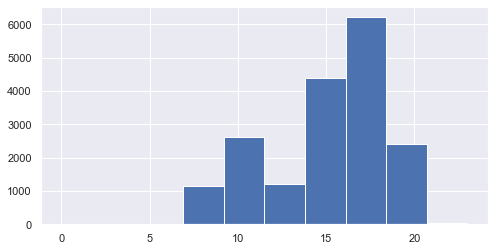

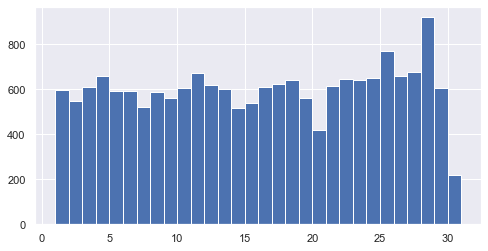

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (8,4))
plt.hist(dt1['order_placed_hour'])
plt.show()

plt.figure(figsize= (8,4))
plt.hist(dt1['order_placed_day'], bins= 30)
plt.show()



## Clustering

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [63]:
repeat_customers= dt1['Consumer_ID'].value_counts().reset_index().rename(columns= {'index': 'Consumer_ID', 'Consumer_ID': 'counts'})
repeat_customers['is_repeat_customers'] =np.where(repeat_customers['counts']>=4, 1,0) 
repeat_customers.head()


,Consumer_ID,counts,is_repeat_customers
0,514,66,1
1,929,50,1
2,11956,47,1
3,2469,43,1
4,4087,39,1


In [64]:
dt1= dt1.merge(repeat_customers[['Consumer_ID', 'counts']], on= 'Consumer_ID', how= 'left')

In [79]:
dt2 = dt1.groupby(['Consumer_ID', 'counts'])[['Amount_of_discount', 'Order_total', 'Amount_of_tip']].mean().reset_index()
dt2.head()


,Consumer_ID,counts,Amount_of_discount,Order_total,Amount_of_tip
0,5,3,32.95,32.950000,2.896667
1,14,14,0.00,44.298571,4.187143
2,15,7,0.00,38.247143,1.535714
3,21,5,0.00,37.932000,1.898000
4,25,1,0.00,38.520000,1.490000


In [80]:
X = dt2[['counts', 'Amount_of_discount', 'Order_total', 'Amount_of_tip']]
scaler = StandardScaler()
X1= scaler.fit_transform(X)



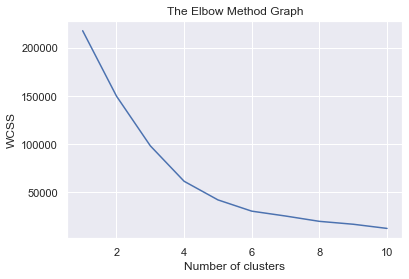

In [82]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X1)

    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10 , random_state= 200)
y_kmeans = kmeans.fit_predict(X1)
dt2['clusters_km'] = y_kmeans


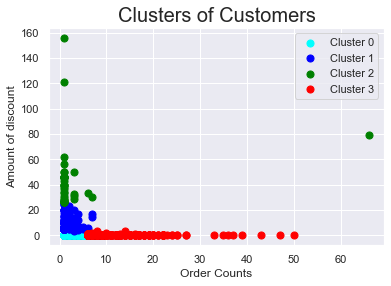

In [84]:
plt.scatter(dt2.loc[dt2.clusters_km==0, 'counts'], dt2.loc[dt2.clusters_km==0, 'Amount_of_discount'], s=50, c='cyan', label ='Cluster 0')
plt.scatter(dt2.loc[dt2.clusters_km==1, 'counts'], dt2.loc[dt2.clusters_km==1, 'Amount_of_discount'], s=50, c='blue', label ='Cluster 1')
plt.scatter(dt2.loc[dt2.clusters_km==2, 'counts'], dt2.loc[dt2.clusters_km==2, 'Amount_of_discount'], s=50, c='green', label ='Cluster 2')
plt.scatter(dt2.loc[dt2.clusters_km==3, 'counts'], dt2.loc[dt2.clusters_km==3, 'Amount_of_discount'], s=50, c='red', label ='Cluster 3')
plt.title('Clusters of Customers', size= 20)
plt.xlabel('Order Counts')
plt.ylabel('Amount of discount')
plt.legend(loc="upper right")
plt.show()


In [88]:
dt_new= dt2.merge(repeat_customers[['Consumer_ID', 'is_repeat_customers']], on= 'Consumer_ID', how= 'left')
dt_new.groupby('clusters_km')['is_repeat_customers'].value_counts(True)
dt_new.head()


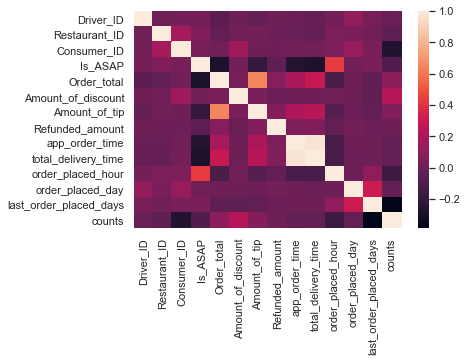

In [97]:
corr = dt1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



In [101]:
dt1[dt1.Is_ASAP == True].groupby(['order_placed_time_of_day'])['total_delivery_time'].median()
dt1[dt1.Is_ASAP == True].groupby(['order_placed_time_of_day'])['total_delivery_time'].mean()


order_placed_time_of_day
Afternoon     46.914908
Morning      136.529167
Night         46.827193
Name: total_delivery_time, dtype: float64

In [102]:
no_of_drivers = dt1[dt1.Is_ASAP == True].groupby(['order_placed_hour'])['Driver_ID'].nunique().reset_index().rename(columns= {'Driver_ID' : 'unique_drivers'})
no_of_orders = dt1[dt1.Is_ASAP == True].groupby(['order_placed_hour'])['Consumer_ID'].count().reset_index().rename(columns= {'Consumer_ID' : 'total_orders'})
avg_delivery_time = dt1[dt1.Is_ASAP == True].groupby(['order_placed_hour'])['total_delivery_time'].mean().reset_index().rename(columns= {'total_delivery_time' : 'avg_delivery_time'})

no_of_orders = no_of_orders.merge(no_of_drivers, on= 'order_placed_hour')
no_of_orders['no_of_orders_per_driver'] = no_of_orders['total_orders']/no_of_orders['unique_drivers']
no_of_orders = no_of_orders.merge(avg_delivery_time, on= 'order_placed_hour')

no_of_orders.sort_values('no_of_orders_per_driver')



,order_placed_hour,total_orders,unique_drivers,no_of_orders_per_driver,avg_delivery_time
0,7,1,1,1.000000,178.066667
1,8,1,1,1.000000,188.033333
2,9,2,2,1.000000,90.008333
7,14,6,6,1.000000,38.875000
14,21,8,8,1.000000,28.354167
8,15,390,139,2.805755,42.114145
6,13,181,64,2.828125,43.535175
13,20,642,140,4.585714,37.722404
5,12,805,161,5.000000,41.279793
3,10,1040,173,6.011561,52.526651


In [107]:
no_of_drivers = dt1[dt1.Is_ASAP == True].groupby(['order_placed_time_of_day'])['Driver_ID'].nunique().reset_index().rename(columns= {'Driver_ID' : 'unique_drivers'})
order_placed_time_of_day = dt1[dt1.Is_ASAP == True].groupby(['order_placed_time_of_day'])['Consumer_ID'].count().reset_index().rename(columns= {'Consumer_ID' : 'total_orders'})
avg_delivery_time = dt1[dt1.Is_ASAP == True].groupby(['order_placed_time_of_day'])['total_delivery_time'].mean()

order_placed_time_of_day = order_placed_time_of_day.merge(no_of_drivers, on= 'order_placed_time_of_day')
order_placed_time_of_day['no_of_orders_per_driver'] = order_placed_time_of_day['total_orders']/no_of_orders['unique_drivers']
order_placed_time_of_day = order_placed_time_of_day.merge(avg_delivery_time, on= 'order_placed_time_of_day')

order_placed_time_of_day



,order_placed_time_of_day,total_orders,unique_drivers,no_of_orders_per_driver,total_delivery_time
0,Afternoon,5979,283,26.109170,46.914908
1,Morning,4,3,0.014235,136.529167
2,Night,8452,264,30.185714,46.827193


In [109]:
no_of_drivers = dt1[dt1.Is_ASAP == True].groupby(['delivery_time_bucket'])['Driver_ID'].nunique().reset_index().rename(columns= {'Driver_ID' : 'unique_drivers'})
delivery_time_bucket = dt1[dt1.Is_ASAP == True].groupby(['delivery_time_bucket'])['Consumer_ID'].count().reset_index().rename(columns= {'Consumer_ID' : 'total_orders'})
avg_delivery_time = dt1[dt1.Is_ASAP == True].groupby(['delivery_time_bucket'])['total_delivery_time'].mean().reset_index()

delivery_time_bucket = delivery_time_bucket.merge(no_of_drivers, on= 'delivery_time_bucket')
delivery_time_bucket['no_of_orders_per_driver'] = delivery_time_bucket['total_orders']/no_of_orders['unique_drivers']
delivery_time_bucket = delivery_time_bucket.merge(avg_delivery_time, on= 'delivery_time_bucket')

delivery_time_bucket



,delivery_time_bucket,total_orders,unique_drivers,no_of_orders_per_driver,total_delivery_time
0,1. 0 to 30,1734,229,7.572052,26.014629
1,2. 30 to 45,5921,281,21.071174,37.689199
2,3. 45 to 60,4240,280,15.142857,51.717869
3,4. More than 60,2540,257,9.883268,74.520827


In [111]:
dt1.groupby('delivery_time_bucket')['Restaurant_ID'].value_counts(True)

delivery_time_bucket  Restaurant_ID
1. 0 to 30            12               0.063537
                      20               0.044648
                      9                0.038924
                      10               0.030910
                      8                0.030338
                                         ...   
4. More than 60       392              0.000177
                      393              0.000177
                      397              0.000177
                      400              0.000177
                      401              0.000177
Name: Restaurant_ID, Length: 1055, dtype: float64

In [112]:
dt1.groupby(['Delivery_Region'])['Order_total'].mean()

Delivery_Region
Mountain View     52.072439
None             224.363846
Palo Alto         52.482654
San Jose          43.737433
Name: Order_total, dtype: float64

In [113]:
dt1.Delivery_Region.value_counts(True)

Palo Alto        0.632426
Mountain View    0.207988
San Jose         0.158148
None             0.001438
Name: Delivery_Region, dtype: float64